In [2505]:
import pandas as pd
import requests
import datetime as dt
import tweepy 
import numpy as np
import matplotlib.pyplot as plt



## Gather

In [2506]:
##keys Provided by twitter
#consumer_key = 00000000000000000000

#consumer_secret = 00000000000000000000000000000

#access_token = 000000

#access_token_secret = 0000000

##OAuth 1a authentication

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)
    




In [2507]:
#downloaded programmatically using the Requests library 
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open(url.split('/')[-1] ,mode= 'wb') as file:
        file.write(r.content)

In [2508]:
#read tsv into a dataframe
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [2509]:
#read csv into a dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

FileNotFoundError: [Errno 2] File twitter-archive-enhanced.csv does not exist: 'twitter-archive-enhanced.csv'

In [ ]:
# read the file in dataframe
with open('tweet-json.txt', 'r') as f:
    tweet_json = pd.read_json(f, lines= True, encoding = 'utf-8')



# Assess

## tweet_json start

In [ ]:
# Display the tweet_json table
tweet_json

In [ ]:
#random sample 
tweet_json.sample(10)

In [ ]:
tweet_json.info()

In [ ]:
#describe numerical value in a dataset
tweet_json.describe()

In [ ]:
#the number of null values in each column
tweet_json.isnull().sum()


In [ ]:
#check for duplicate id column
tweet_json['id'].duplicated().sum()

In [ ]:
tweet_json['retweeted'].value_counts() #seems there is no retweeted tweets

In [2510]:
tweet_json['favorited'].value_counts() #but there are favourited tweets

False    2346
True        8
Name: favorited, dtype: int64

In [2511]:
tweet_json['is_quote_status'].value_counts()

False    2323
True       31
Name: is_quote_status, dtype: int64

In [2512]:
tweet_json['possibly_sensitive'].value_counts()

0.0    2211
Name: possibly_sensitive, dtype: int64

In [2513]:
tweet_json['possibly_sensitive_appealable'].value_counts()

0.0    2211
Name: possibly_sensitive_appealable, dtype: int64

In [2514]:
tweet_json['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [2515]:
tweet_json['retweet_count'].value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [2516]:
tweet_json.created_at.min(),tweet_json.created_at.max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

ids columns have int and float datatype

source inside html tag

null columns(most null) geo,coordinates,place ,contributors 

possibly_sensitive,possibly_sensitive_appealable all 0.0

id column is unique( primary key ),the column name (id) doesn't match with other tables


## Cleaning 

### define

1-covert ('id' ,'id_str'  , 'in_reply_to_status_id' ,'in_reply_to_status_id_str' ,'in_reply_to_user_id' , 'in_reply_to_user_id_str' ,  'quoted_status_id'  ,'quoted_status_id_str')  columns into object datatype,using astype(str) method

2_replace nan with null value after converting the datatype,using pandas replace metod

3_extract the used source from source column,using split() method

4_drop null columns(most null),using pandas drop() method

5_drop possibly_sensitive,possibly_sensitive_appealable not needed in analysis ,using pandas drop() method

6_rename id column to tweet_id,using pandas rename() method

### code

In [2517]:
#make a copy
clean_tweet_json=tweet_json.copy()

In [2518]:
#1
clean_tweet_json[['id' ,'id_str'  , 'in_reply_to_status_id' ,'in_reply_to_status_id_str' ,'in_reply_to_user_id' , 'in_reply_to_user_id_str' ,  'quoted_status_id'  ,'quoted_status_id_str' ]] = clean_tweet_json[['id' ,'id_str'  , 'in_reply_to_status_id' ,'in_reply_to_status_id_str' ,'in_reply_to_user_id' , 'in_reply_to_user_id_str' ,  'quoted_status_id'  ,'quoted_status_id_str' ]].astype(str)

In [2519]:
#2
#replace nan with null value 
clean_tweet_json.replace(r'nan', np.NaN,inplace=True)

In [2520]:
#test
clean_tweet_json['in_reply_to_user_id'].isnull().sum()

2276

In [2521]:
#3
clean_tweet_json['source']=clean_tweet_json['source'].str.split('</a>').str[0].str.split('>').str[1]

In [2522]:
#5,4
clean_tweet_json.drop(['geo', 'coordinates','place','contributors','possibly_sensitive','possibly_sensitive_appealable'], axis=1,inplace=True)

In [2523]:
#6
#rename id column to tweet_id 
clean_tweet_json.rename(columns={'id':'tweet_id'},inplace=True)

### test

In [2524]:
#1
clean_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 2354 non-null   datetime64[ns, UTC]
 1   tweet_id                   2354 non-null   object             
 2   id_str                     2354 non-null   object             
 3   full_text                  2354 non-null   object             
 4   truncated                  2354 non-null   bool               
 5   display_text_range         2354 non-null   object             
 6   entities                   2354 non-null   object             
 7   extended_entities          2073 non-null   object             
 8   source                     2354 non-null   object             
 9   in_reply_to_status_id      78 non-null     object             
 10  in_reply_to_status_id_str  78 non-null     object             
 11  in_r

In [2525]:
#2
clean_tweet_json.source.value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [2526]:
clean_tweet_json.sample(10)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
592,2016-11-16 16:28:21+00:00,798925684722855936,798925684722855936,This is Shadow. He's a firm believer that they...,False,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 798925670629916672, 'id_str'...",Twitter for iPhone,NaN,...,False,1663,8246,False,False,en,NaN,NaN,NaN,NaN
1462,2016-02-02 03:08:26+00:00,694356675654983680,694356675654983680,This pupper only appears through the hole of a...,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 694356670072373248, 'id_str'...",Twitter for iPhone,6.70668383499735e+17,...,False,328,1653,False,False,en,NaN,NaN,NaN,NaN
158,2017-05-06 22:16:42+00:00,860981674716409858,860981674716409856,RT @dog_rates: Meet Lorenzo. He's an avid nift...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,Twitter for iPhone,NaN,...,False,2334,0,False,False,en,{'created_at': 'Fri May 05 18:36:06 +0000 2017...,NaN,NaN,NaN
1040,2016-06-17 19:59:26+00:00,743895849529389061,743895849529389056,When you're given AUX cord privileges from the...,False,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 743895842243887104, 'id_str'...",Twitter for iPhone,NaN,...,False,1087,3999,False,False,en,NaN,NaN,NaN,NaN
1006,2016-06-28 00:54:46+00:00,747594051852075008,747594051852075008,Again w the sharks guys. This week is about do...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 747594043354419201, 'id_str'...",Twitter for iPhone,NaN,...,False,1205,4065,False,False,en,NaN,NaN,NaN,NaN
972,2016-07-04 20:00:23+00:00,750056684286914561,750056684286914560,This is Jameson. He had a few too many in the ...,False,"[0, 102]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 749833783789154304, 'id_str'...",TweetDeck,NaN,...,False,1011,3444,False,False,en,NaN,NaN,NaN,NaN
876,2016-08-03 02:02:14+00:00,760656994973933572,760656994973933568,This is Rose. Her face is stuck like that. 11/...,False,"[0, 73]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 760656987008987136, 'id_str'...",Twitter for iPhone,NaN,...,False,2210,7343,False,False,en,NaN,NaN,NaN,NaN
51,2017-07-04 01:18:17+00:00,882045870035918850,882045870035918848,"This is Koko. Her owner, inspired by Barney, r...",False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 882045864507736065, 'id_str'...",Twitter for iPhone,NaN,...,False,5203,29900,False,False,en,NaN,NaN,NaN,NaN
706,2016-10-10 16:20:36+00:00,785515384317313025,785515384317313024,"Today, 10/10, should be National Dog Rates Day",False,"[0, 46]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,Twitter for iPhone,NaN,...,False,1477,6800,False,False,en,NaN,NaN,NaN,NaN
2156,2015-11-25 17:49:14+00:00,669573570759163904,669573570759163904,This is Linda. She just looked up and saw you ...,False,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669573559438712832, 'id_str'...",Twitter for iPhone,NaN,...,False,156,467,False,False,en,NaN,NaN,NaN,NaN


In [2527]:
clean_tweet_json.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


## tweet_json end

## twitter_archive start

# Assess

In [2528]:
# Display the twitter_archive  table
twitter_archive


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [2529]:
#display 10 random rows
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1075,739623569819336705,NaN,NaN,2016-06-06 01:02:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo that don't need no human. 12/10...,NaN,NaN,NaN,https://vine.co/v/iY9Fr1I31U6,12,10,None,doggo,None,None,None
2058,671347597085433856,NaN,NaN,2015-11-30 15:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She was not fully prepared for t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671347597...,9,10,Lola,None,None,None,None
1838,675898130735476737,NaN,NaN,2015-12-13 04:40:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm sure you've all seen this pupper. Not prep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675898130...,10,10,None,None,None,pupper,None
1606,685667379192414208,NaN,NaN,2016-01-09 03:40:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marty. He has no idea what happened he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685667379...,9,10,Marty,None,None,pupper,None
2119,670417414769758208,NaN,NaN,2015-11-28 01:42:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sharp dog here. Introverted. Loves purple. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670417414...,6,10,None,None,None,None,None
1133,728751179681943552,NaN,NaN,2016-05-07 00:59:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flurpson. He can't believe it's not bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728751179...,10,10,Flurpson,None,None,None,None
89,875021211251597312,NaN,NaN,2017-06-14 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys please stop sending pictures without any ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875021211...,12,10,None,None,None,None,None
708,785264754247995392,NaN,NaN,2016-10-09 23:44:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He requested to be carried around...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785264754...,12,10,Doc,None,None,None,None
1915,674318007229923329,NaN,NaN,2015-12-08 20:01:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lennon. He's in quite the predicament....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674318007...,8,10,Lennon,None,None,pupper,None
1186,718540630683709445,NaN,NaN,2016-04-08 20:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Get you a pup that can do both. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718540630...,10,10,None,None,None,None,None


In [2530]:
#display general information about dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [2531]:
#display statistical summary for numerical columns
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [2532]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [2533]:
twitter_archive["doggo"].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [2534]:
#check for duplicates
twitter_archive['tweet_id'].duplicated().sum()

0

In [2535]:
twitter_archive['name'].value_counts() #there are Nones need to be cean

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
             ... 
incredibly      1
BeBe            1
Stormy          1
Fwed            1
Ember           1
Name: name, Length: 957, dtype: int64

In [2536]:
#the number of null values in each column
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

timestamp ,retweeted_status_timestamp datatype object

ids columns int and float

source inside html tag

doggo ,floofer ,pupper ,puppo columns not structured well 

tweet_id column is unique( primary key )

There are columns(name,doggo,floofer,pupper	,puppo) represent null value as None 




## cleaning

In [2537]:
#first of all make a copy
clean_twitter_archive=twitter_archive.copy()

### define

1-convert timestamp ,retweeted_status_timestamp to a datetime datatype , using pandas to_datetime() method

2-convert ids columns to object,using astype(str) method

3-source column strip to extract the source, using split() method

4-combine doggo ,floofer ,pupper ,puppo  columns in one column dog_stage ,using + operation

5_After combined columns in dog_stage , there are a few cases, where a dog has more than one style: (doggofloofer, doggopupper ,doggopuppo) the stages need to be separated with( ,) to be (doggo,floofer),by using conditional assigning


6-replace None in (name,doggo,floofer,pupper,puppo) column to null value,using replace() method

7_drop (name,doggo,floofer,pupper,puppo) columns using drop() method


### code

In [2538]:
#1
clean_twitter_archive['timestamp']=pd.to_datetime(clean_twitter_archive['timestamp'])
clean_twitter_archive['retweeted_status_timestamp']=pd.to_datetime(clean_twitter_archive['retweeted_status_timestamp'])
clean_twitter_archive.replace(r'nan', np.NaN,inplace=True)



In [2539]:
#2
clean_twitter_archive[['tweet_id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id' ]] = clean_twitter_archive[['tweet_id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id']].astype(str)

In [2540]:
clean_twitter_archive.replace(r'nan', np.NaN,inplace=True)

In [2541]:
#3
clean_twitter_archive['source']=clean_twitter_archive['source'].str.split('</a>').str[0].str.split('>').str[1]

In [2542]:
clean_twitter_archive.doggo.replace('None','',inplace=True)

In [2543]:

clean_twitter_archive.floofer.replace('None','',inplace=True)

In [2544]:

clean_twitter_archive.pupper.replace('None','',inplace=True)

In [2545]:

clean_twitter_archive.puppo.replace('None','',inplace=True)

In [2546]:
clean_twitter_archive["doggo"].value_counts()  

         2259
doggo      97
Name: doggo, dtype: int64

In [2547]:
clean_twitter_archive["puppo"].value_counts() 

         2326
puppo      30
Name: puppo, dtype: int64

In [2548]:
clean_twitter_archive["pupper"].value_counts() 

          2099
pupper     257
Name: pupper, dtype: int64

In [2549]:
clean_twitter_archive["floofer"].value_counts() 

           2346
floofer      10
Name: floofer, dtype: int64

In [2550]:
#4
clean_twitter_archive['dog_stage'] = clean_twitter_archive["doggo"]+clean_twitter_archive['floofer']+clean_twitter_archive['pupper']+clean_twitter_archive['puppo']

In [2551]:
clean_twitter_archive['dog_stage'].value_counts()#there are som values with two dog_stage

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

Assessment 
After combined columns in dog_stage , there are a few cases, where a dog has more than one style: (doggofloofer, doggopupper ,doggopuppo) the stages need to be separated with( ,) to be (doggo,floofer)

In [2552]:
# for dogs with two stages replaced with two stages seprated with ','
clean_twitter_archive.loc[clean_twitter_archive.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
clean_twitter_archive.loc[clean_twitter_archive.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
clean_twitter_archive.loc[clean_twitter_archive.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'
clean_twitter_archive.replace(r'', np.NaN,inplace=True)

In [2553]:
clean_twitter_archive['dog_stage'].value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

In [2554]:
#6
# drop not needed columns
clean_twitter_archive.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [2555]:
#5
clean_twitter_archive.name.replace(r'None', np.NaN,inplace=True)


### test

In [2556]:
#1,2
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [2557]:
#3
clean_twitter_archive['source'].tolist()

['Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter f

In [2558]:
clean_twitter_archive['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [2559]:
clean_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
dog_stage                     1976
dtype: int64

In [2560]:
clean_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN


## twitter_archive end

## Cleaning 

### define

merge two table clean_tweet_json and clean_twitter_archive using pandas merge() method

In [2561]:
#merge two above table
master = pd.merge(clean_twitter_archive, clean_tweet_json,how='left', on=['tweet_id','source','in_reply_to_status_id','in_reply_to_user_id'])

In [2562]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## image-predictions start

# Assess

In [2563]:
#Display the image-predictions  table
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [2564]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
592,679462823135686656,https://pbs.twimg.com/media/CW3v1KxW8AAIOuy.jpg,1,toy_poodle,0.621780,True,miniature_poodle,0.197819,True,soft-coated_wheaten_terrier,0.046745,True
538,676949632774234114,https://pbs.twimg.com/media/CWUCGMtWEAAjXnS.jpg,1,Welsh_springer_spaniel,0.206479,True,Saint_Bernard,0.139339,True,boxer,0.114606,True
1216,743545585370791937,https://pbs.twimg.com/media/ClGawiUWAAAgs0w.jpg,2,rapeseed,0.876875,False,standard_poodle,0.060584,True,Great_Pyrenees,0.033006,True
1579,796177847564038144,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,1,golden_retriever,0.600276,True,Labrador_retriever,0.140798,True,seat_belt,0.087355,False
449,674737130913071104,https://pbs.twimg.com/media/CV0l10AU8AAfg-a.jpg,1,Pomeranian,0.948537,True,schipperke,0.014310,True,Chihuahua,0.008120,True
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True
556,677673981332312066,https://pbs.twimg.com/media/CWeU5LBWEAA8F0J.jpg,1,Maltese_dog,0.817908,True,Angora,0.077805,False,Pomeranian,0.022184,True
533,676897532954456065,https://pbs.twimg.com/media/CWTSt0UW4AALMNB.jpg,1,hamster,0.628255,False,guinea_pig,0.318646,False,macaque,0.013058,False
1430,773191612633579521,https://pbs.twimg.com/media/CrrtqjdXEAINleR.jpg,1,Blenheim_spaniel,0.427766,True,Shih-Tzu,0.219256,True,Welsh_springer_spaniel,0.144614,True
822,693109034023534592,https://pbs.twimg.com/ext_tw_video_thumb/69310...,1,cocker_spaniel,0.740013,True,Welsh_springer_spaniel,0.088739,True,golden_retriever,0.047470,True


In [2565]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [2566]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [2567]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [2568]:
image_predictions.tweet_id.duplicated().sum()

0

In [2569]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [2570]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

tweet_id int datatype
there are 2075 rows in the image_predictions

no duplicated tweet_id

index 2071 row only  p2_dog True the photo actually  for a dog

index 2074 row all (p1_dog,p2_dog,p3_dog) False but the photo actually  for a dog




# cleaning

### define

1_convert tweet_id to object ,using astype(str)

2_there are 2075 rows in the image_predictions table but for twitter_archive 2356 rows and tweet_json 2354. Because  the non-pictures  retweets included,when merging we will use right join to exclude rows without pictures 

3_merge all tables using pandas merge

### code

In [2571]:
#make a copy
clean_image_predictions=image_predictions.copy()

In [2572]:
#1
clean_image_predictions['tweet_id']=clean_image_predictions.astype(str)

In [2573]:
#2,3
#merge clean_image_predictions with other tables
twitter_archive_master = pd.merge(master, clean_image_predictions,how='right', on=['tweet_id'])

### test

In [2574]:
clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [2575]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2075 non-null   object             
 1   in_reply_to_status_id       23 non-null     object             
 2   in_reply_to_user_id         23 non-null     object             
 3   timestamp                   2075 non-null   datetime64[ns, UTC]
 4   source                      2075 non-null   object             
 5   text                        2075 non-null   object             
 6   retweeted_status_id         81 non-null     object             
 7   retweeted_status_user_id    81 non-null     object             
 8   retweeted_status_timestamp  81 non-null     datetime64[ns, UTC]
 9   expanded_urls               2075 non-null   object             
 10  rating_numerator            2075 non-null   int64           

In [2576]:
twitter_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2071,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2072,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2073,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [2577]:
#save twitter_archive_master to a csv file
twitter_archive_master.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

# Visualization & Analysis


### what is the relationship between favorite_count and retweet_count?

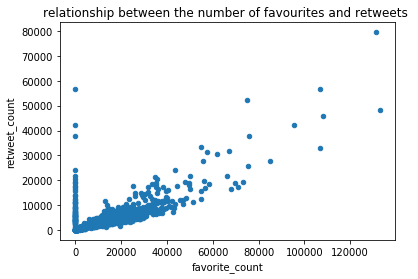

In [2578]:
twitter_archive_master.plot( x="favorite_count", y="retweet_count",kind="scatter",title='relationship between the number of favourites and retweets ');

Generally  positive correlation  the number of retweets increase as the number of favourites 

### dose the day of the week have an impact on retweet_count?


In [2579]:
#using groupby to find the mean of retweet_count each day of the week
twitter_archive_master['dayofweek'] = pd.DatetimeIndex(twitter_archive_master['timestamp']).strftime('%a')



average =twitter_archive_master.groupby('dayofweek')['retweet_count'].mean()


In [2580]:
average

dayofweek
Fri    2980.359322
Mon    2734.070796
Sat    3198.282443
Sun    2835.221374
Thu    2678.378007
Tue    2931.450161
Wed    3487.252396
Name: retweet_count, dtype: float64

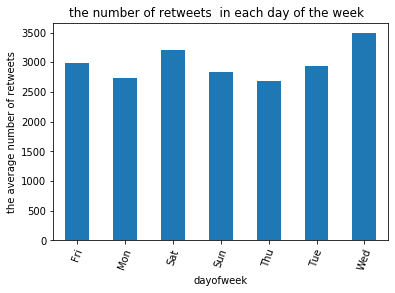

In [2581]:
average.plot.bar(rot=70, title="the number of retweets  in each day of the week  ");
plt.ylabel('the average number of retweets');

as we can see  Wednesday  got most retweets number  and the Thursday  got less retweets number amoung other days ,but the difference between each day is not significant 

what is the number of tweets in each month ?

In [2582]:
#using groupby to find the number of tweet each years 
twitter_archive_master['month'] = pd.DatetimeIndex(twitter_archive_master['timestamp']).month
num_tweet=twitter_archive_master.groupby('month')['tweet_id'].count()
num_tweet

month
1     246
2     179
3     174
4      98
5     103
6     127
7     145
8      66
9      71
10     71
11    367
12    428
Name: tweet_id, dtype: int64

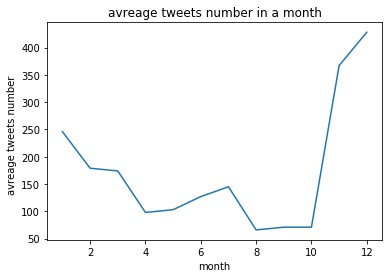

In [2583]:
lines=num_tweet.plot.line(x='month', y='tweet_id')

plt.xlabel('month');
plt.ylabel('avreage tweets number  ');
plt.title('avreage tweets number in a month');


there is noticable variation of average tweets number in each m,onth the lowest number of tweets in August and the highest in December .